<a href="https://colab.research.google.com/github/Vonewman/Natural_Language_Processing/blob/master/nlp_sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [5]:
import os

In [6]:
!pwd

/content


In [7]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [8]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 163MB/s]


In [9]:
!unzip sentiment-analysis-on-movie-reviews -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [10]:
train_fname = "data/train.tsv.zip"
test_fname = "data/test.tsv.zip"
sub_fname = "data/sampleSubmission.csv"

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [11]:
import pandas as pd

In [12]:
raw_df = pd.read_csv(train_fname, sep="\t")

In [13]:
raw_df.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [14]:
raw_df.Phrase.sample(10).values

array(['founding', 'highs', 'as Hip-Hop Scooby-Doo',
       'the special spark between the characters that made the first film such a delight',
       'The tone errs on the shrill side , tempered by a soft southern gentility that speaks of beauty , grace and a closet full of skeletons .',
       'average television', "stands for Milder Is n't Better",
       'succeeds through sincerity .',
       "it delivers the same message as Jiri Menzel 's Closely Watched Trains and Danis Tanovic 's No Man 's Land .",
       'winning performances'], dtype=object)

In [15]:
test_df = pd.read_csv(test_fname, sep="\t")

In [16]:
sub_df = pd.read_csv(sub_fname)

In [17]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


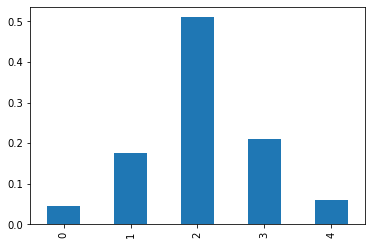

In [18]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

In [19]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


Summarize your insights and learnings from the dataset below:

* The dataset are imbalanced
* There are two relevant features: `Phrase` and `Sentiment`
* We can delete `PhraseId` and `SentenceId` 

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [20]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
stemmer = SnowballStemmer(language='english')

In [23]:
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [24]:
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
english_stopwords = stopwords.words('english')

In [27]:
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
selected_stopwords = english_stopwords[:115]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=selected_stopwords,
                             ngram_range=(1, 2),
                             max_features=2000)

In [31]:
import warnings

warnings.filterwarnings("ignore")

In [32]:
vectorizer.fit(raw_df.Phrase)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f9e2ecd7c10>)

In [33]:
len(vectorizer.vocabulary_)

2000

In [34]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [35]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [36]:
inputs = vectorizer.transform(raw_df.Phrase)

In [37]:
inputs.shape

(156060, 2000)

In [38]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [40]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [41]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [42]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [43]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [44]:
TRAIN_SIZE = 110_000

In [45]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [46]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [47]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [48]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(train_inputs, train_targets)

LogisticRegression()

In [52]:
train_preds = model.predict(train_inputs)

In [53]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [54]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(train_targets, train_preds)

0.6381818181818182

In [57]:
val_preds = model.predict(val_inputs)

In [58]:
val_preds.shape

(46060,)

In [59]:
accuracy_score(val_targets, val_preds)

0.5795049934867564

In [60]:
train_preds = model.predict(train_inputs)

In [61]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

### Study Predictions on Sample Inputs

In [62]:
small_df = raw_df.sample(20)

In [63]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
68315,68316,3467,huge video game,2
120051,120052,6421,deeply biased,1
55398,55399,2765,seems most likely that Broomfield 's interview...,2
93675,93676,4884,Bueller 's,2
56037,56038,2802,", the movie is rather choppy .",0
35684,35685,1681,Much of the cast,2
144149,144150,7825,If you 're willing to have fun with it,3
69284,69285,3523,"despite downplaying her good looks , carries a...",3
67435,67436,3422,young males,2
65093,65094,3293,is wholly unconvincing,1


In [64]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [66]:
small_inputs.shape

(20, 2000)

In [67]:
small_preds = model.predict(small_inputs)

In [68]:
small_preds

array([2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 3, 2])

In [69]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [70]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [71]:
test_preds = model.predict(test_inputs)

In [72]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [73]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [78]:
sub_df.Sentiment = test_preds

In [79]:
sub_df.to_csv("submission.csv", index=False)

In [80]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1: RandomForest

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier()

In [83]:
model.fit(train_inputs, train_targets)

RandomForestClassifier()

In [87]:
train_preds = model.predict(train_inputs)

In [88]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [89]:
train_preds

array([1, 2, 2, ..., 0, 0, 2])

In [90]:
accuracy_score(train_targets, train_preds)

0.7902545454545454

In [91]:
val_preds = model.predict(val_inputs)

In [92]:
accuracy_score(val_targets, val_preds)

0.557251411202779

In [93]:
test_preds = model.predict(test_inputs)

In [96]:
test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [97]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [98]:
sub_df.Sentiment = test_preds

In [101]:
sub_df.to_csv("submission1.csv", index=False)

### Model 2

In [102]:
from xgboost import XGBClassifier

In [103]:
model = XGBClassifier()

In [104]:
model.fit(train_inputs, train_targets)

XGBClassifier(objective='multi:softprob')

In [105]:
train_preds = model.predict(train_inputs)

In [106]:
accuracy_score(train_targets, train_preds)

0.5425545454545454

In [112]:
val_preds = model.predict(val_inputs)

In [113]:
accuracy_score(val_targets, val_preds)

0.5284845853234911

### Model 3

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
model = DecisionTreeClassifier()

In [109]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier()

In [110]:
train_preds = model.predict(train_inputs)

In [111]:
accuracy_score(train_targets, train_preds)

0.7902727272727272

In [114]:
val_preds = model.predict(val_inputs)

Best Model:

Logistic Regression

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
